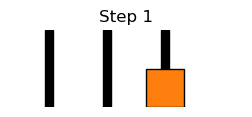

In [7]:
import matplotlib.pyplot as plt
from stack import Stack
import matplotlib.patches as patches

class Hanoi:
    def __init__(self, N):
        self._left = Stack()
        self._middle = Stack()
        self._right = Stack()
        for i in range(N):
            self._left.push(N-i)
        self._frame_idx = 0
        self._N = N
            
    def draw_frame(self):
        """
        Draw the pegs where they currently are, and increment the frame number
        """
        plt.clf()
        ax = plt.gca()
        for k, stack in enumerate([s.get_entire_stack() for s in \
                                    [self._left, self._middle, self._right]]):
            x_center = 0.5 + self._N/2 + k*(0.5 + self._N)
            w = 0.1
            rect = patches.Rectangle((x_center-w, 0), w*2, self._N+1, edgecolor='k', facecolor='k')
            ax.add_patch(rect) 
            for y, disc in enumerate(stack):
                x = x_center - disc/2
                rect = patches.Rectangle((x, y), disc, 1, edgecolor='k', facecolor='C1')
                ax.add_patch(rect)  
        plt.xlim([0, self._N*3+3])
        plt.ylim([0, self._N+1])
        plt.axis('off')
        plt.title("Step {}".format(self._frame_idx))
        plt.savefig("{}.png".format(self._frame_idx), bbox_inches='tight')
        self._frame_idx += 1

    def solve_rec(self, source, free, target, n):
        """
        Parameters
        ----------
        source: stack
            A stack of pegs and their sizes that are currently at
            our source location
        free: stack
            A stack of pegs at a location that can be used as a staging area
        target: stack
            A stack of pegs at a location where we want to put the source pegs
        n: int
            The top n pegs should be moved from the source to the target

        Move the top n pegs from the source to the target,
        using the free area as a staging area if necessary.
        Hint: 
        1) Recursively move the top n-1 discs out of the way
        2) Move the nth disc from the source to the target, then draw with self.draw_frame()
        3) Recursively move the top n-1 discs over the nth one
        """
        if n == 1: # if there is only one piece left move it to the goal
            target.push(source.pop())
            self.draw_frame()
            return
        else: # otherwise move all the pieces ontop of the last disk to the free space move the piece then move everything otop of it
            self.solve_rec(source, target, free, n-1)
            target.push(source.pop())
            self.draw_frame()
            self.solve_rec(free, source, target, n-1)

            
    
    def solve(self):
        """
        Do an animation of the pegs
        """
        fscale = 0.5
        plt.figure(figsize=(fscale*(self._N*3+3), fscale*(self._N+1)))
        self._frame_idx = 0
        self.draw_frame()
        self.solve_rec(self._left, self._middle, self._right,self._N)


h = Hanoi(1)
h.solve()
